In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.ticker import MaxNLocator


In [2]:
# file info
file_path = "./data/{}.csv"
shoes = ["adidas_gazelles", "air_force_1", "air_jordan_1", "air_yeezy_2", "adidas_superstar",
         "balenciaga_speed_trainers", "birkenstocks", "boston_clogs", "brooks_ghost", "chuck_taylor", "crocs_classic_clog", "dr_martens", "fila_disruptor", 
         "golden_goose_superstar", "nike_pegasus", "on_cloud_cloudrunner", "onitsuka_tiger", "puma_palermo", "reebok_floatride_energy", "sambas", "SB_dunk_low", "spezial", 
         "stan_smith", "toms_slip_on_shoes", "uggs", "vans_old_skool", "yeezy_boost_350"]

In [3]:
# read in csvs
df = pd.read_csv(file_path.format(shoes[0]), skiprows=1)

for shoe in shoes[1:]:
    df = pd.merge(df, pd.read_csv(file_path.format(shoe), skiprows=1), on='Month', how='outer')

df.set_index('Month', inplace=True)
df.head()

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Brooks Ghost: (United States),Chuck Taylor: (United States),...,Puma Palermo: (United States),Reebok Floatride Energy: (Worldwide),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),UGGs: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,0.0,8.0,1.0,0.0,6.0,0.0,19.0,0.0,0,27.0,...,0.0,0,1.0,0.0,0.0,9.0,0.0,10,0.0,0.0
2004-02,0.0,8.0,2.0,0.0,9.0,0.0,13.0,0.0,0,28.0,...,0.0,0,0.0,0.0,0.0,7.0,0.0,5,0.0,0.0
2004-03,0.0,9.0,2.0,0.0,10.0,0.0,26.0,0.0,0,24.0,...,0.0,0,0.0,0.0,8.0,9.0,0.0,2,0.0,0.0
2004-04,0.0,9.0,1.0,0.0,9.0,0.0,24.0,0.0,0,27.0,...,0.0,0,0.0,0.0,6.0,16.0,0.0,2,0.0,0.0
2004-05,0.0,7.0,2.0,0.0,5.0,0.0,32.0,0.0,4,23.0,...,0.0,0,1.0,0.0,0.0,9.0,0.0,2,0.0,0.0


In [4]:
df

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Brooks Ghost: (United States),Chuck Taylor: (United States),...,Puma Palermo: (United States),Reebok Floatride Energy: (Worldwide),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),UGGs: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,0.0,8.0,1.0,0.0,6.0,0.0,19.0,0.0,0,27.0,...,0.0,0,1.0,0.0,0.0,9.0,0.0,10,0.0,0.0
2004-02,0.0,8.0,2.0,0.0,9.0,0.0,13.0,0.0,0,28.0,...,0.0,0,0.0,0.0,0.0,7.0,0.0,5,0.0,0.0
2004-03,0.0,9.0,2.0,0.0,10.0,0.0,26.0,0.0,0,24.0,...,0.0,0,0.0,0.0,8.0,9.0,0.0,2,0.0,0.0
2004-04,0.0,9.0,1.0,0.0,9.0,0.0,24.0,0.0,0,27.0,...,0.0,0,0.0,0.0,6.0,16.0,0.0,2,0.0,0.0
2004-05,0.0,7.0,2.0,0.0,5.0,0.0,32.0,0.0,4,23.0,...,0.0,0,1.0,0.0,0.0,9.0,0.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,100.0,27.0,29.0,0.0,44.0,0.0,100.0,78.0,77,47.0,...,98.0,70,100.0,80.0,100.0,28.0,0.0,12,20.0,4.0
2024-09,60.0,21.0,22.0,0.0,35.0,5.0,72.0,95.0,66,31.0,...,71.0,61,67.0,64.0,89.0,31.0,2.0,21,14.0,2.0
2024-10,NaN,NaN,NaN,NaN,25.0,NaN,64.0,NaN,59,NaN,...,NaN,46,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN


In [5]:
# clean up data
# Define a function to convert 'object' columns to integers
def convert_object_to_int(series):
    def convert_value(value):
        if pd.to_numeric(value, errors='coerce') is not None:
            return pd.to_numeric(value)
        else:
            print(type(value))
            return 0
            

    return series.apply(convert_value)


# Identify 'object' columns
object_cols = df.select_dtypes(include=['object']).columns

# Convert 'object' columns to integers
for col in object_cols:
    df[col] = convert_object_to_int(df[col])

In [6]:
print(df.dtypes)

Adidas Gazelles: (United States)              float64
Air Force 1: (United States)                  float64
Air Jordan 1: (United States)                 float64
Air Yeezy 2: (United States)                  float64
Adidas Superstar: (United States)             float64
Balenciaga Speed Trainers: (United States)    float64
Birkenstocks: (United States)                 float64
Boston Clogs: (United States)                 float64
Brooks Ghost: (United States)                   int64
Chuck Taylor: (United States)                 float64
Crocs Classic Clog: (United States)             int64
Dr. Martens: (United States)                  float64
FILA Disruptor: (United States)               float64
Golden Goose Superstar: (United States)       float64
Nike Pegasus: (United States)                   int64
On Cloud Cloudrunner: (United States)           int64
onitsuka tiger: (Worldwide)                     int64
Puma Palermo: (United States)                 float64
Reebok Floatride Energy: (Wo

In [9]:
# plotting function
def plot_graphs(df, title, scatter=False, pred_df=None):
    # Create a figure with multiple subplots
    # fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 6*len(df.columns))) 
    
    num_rows = int(np.ceil(len(df.columns) / 3))
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Iterate over columns and axes
    for ax, column in zip(axes, df.columns):
        if not scatter:
            ax.plot(df.index, df[column], label='Actual popularity')
        else:
            ax.scatter(df.index, df[column])
            
        ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
        ax.set_title(column[:-17] + ": " + title)
        ax.set_xlabel("Month")
        ax.set_ylabel(title)
        if pred_df is not None:
            ax.plot(pred_df.index, pred_df[column], color='orange', linestyle='--', label='Prediction')

            # pred_df[column].plot(ax=ax, color='orange', linestyle='--', label='Prediction')
            ax.legend()
    
    # Layout so plots do not overlap
    fig.tight_layout()
    
    # Display the plot
    plt.show()

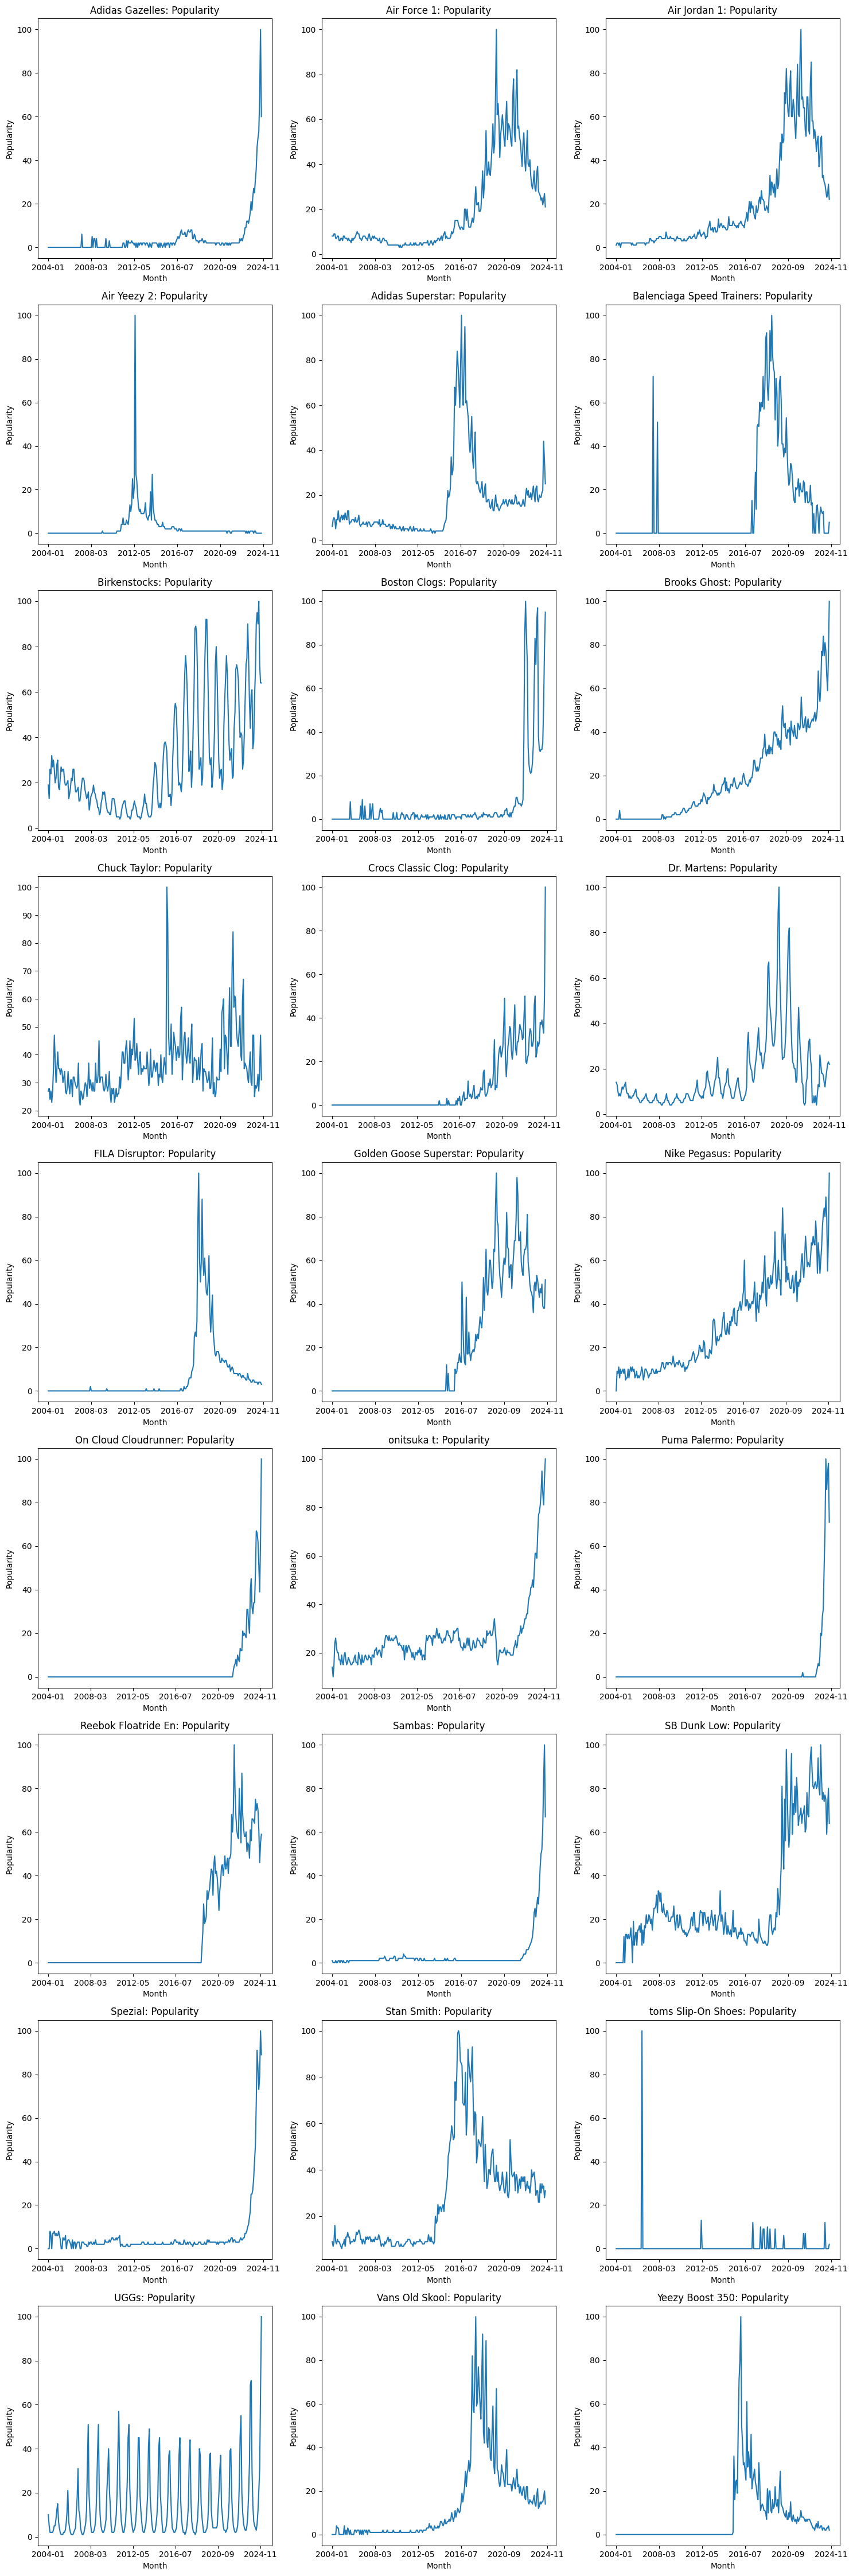

In [8]:
# plot all the data
plot_graphs(df, "Popularity")

In [86]:
growth_rate_df = df.pct_change(fill_method=None) 
# replace NaN with 0
growth_rate_df.head()

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Chuck Taylor: (United States),Dr. Martens: (United States),FILA Disruptor: (United States),Golden Goose Superstar: (United States),Puma Palermo: (United States),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,
2004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,NaN,0.000000,1.0,NaN,0.500000,NaN,-0.315789,NaN,0.037037,-0.071429,NaN,NaN,NaN,-1.0,NaN,NaN,-0.222222,NaN,NaN,NaN
2004-03,NaN,0.125000,0.0,NaN,0.111111,NaN,1.000000,NaN,-0.142857,-0.230769,NaN,NaN,NaN,NaN,NaN,inf,0.285714,NaN,NaN,NaN
2004-04,NaN,0.000000,-0.5,NaN,-0.100000,NaN,-0.076923,NaN,0.125000,-0.200000,NaN,NaN,NaN,NaN,NaN,-0.25,0.777778,NaN,NaN,NaN
2004-05,NaN,-0.222222,1.0,NaN,-0.444444,NaN,0.333333,NaN,-0.148148,0.125000,NaN,NaN,NaN,inf,NaN,-1.00,-0.437500,NaN,NaN,NaN


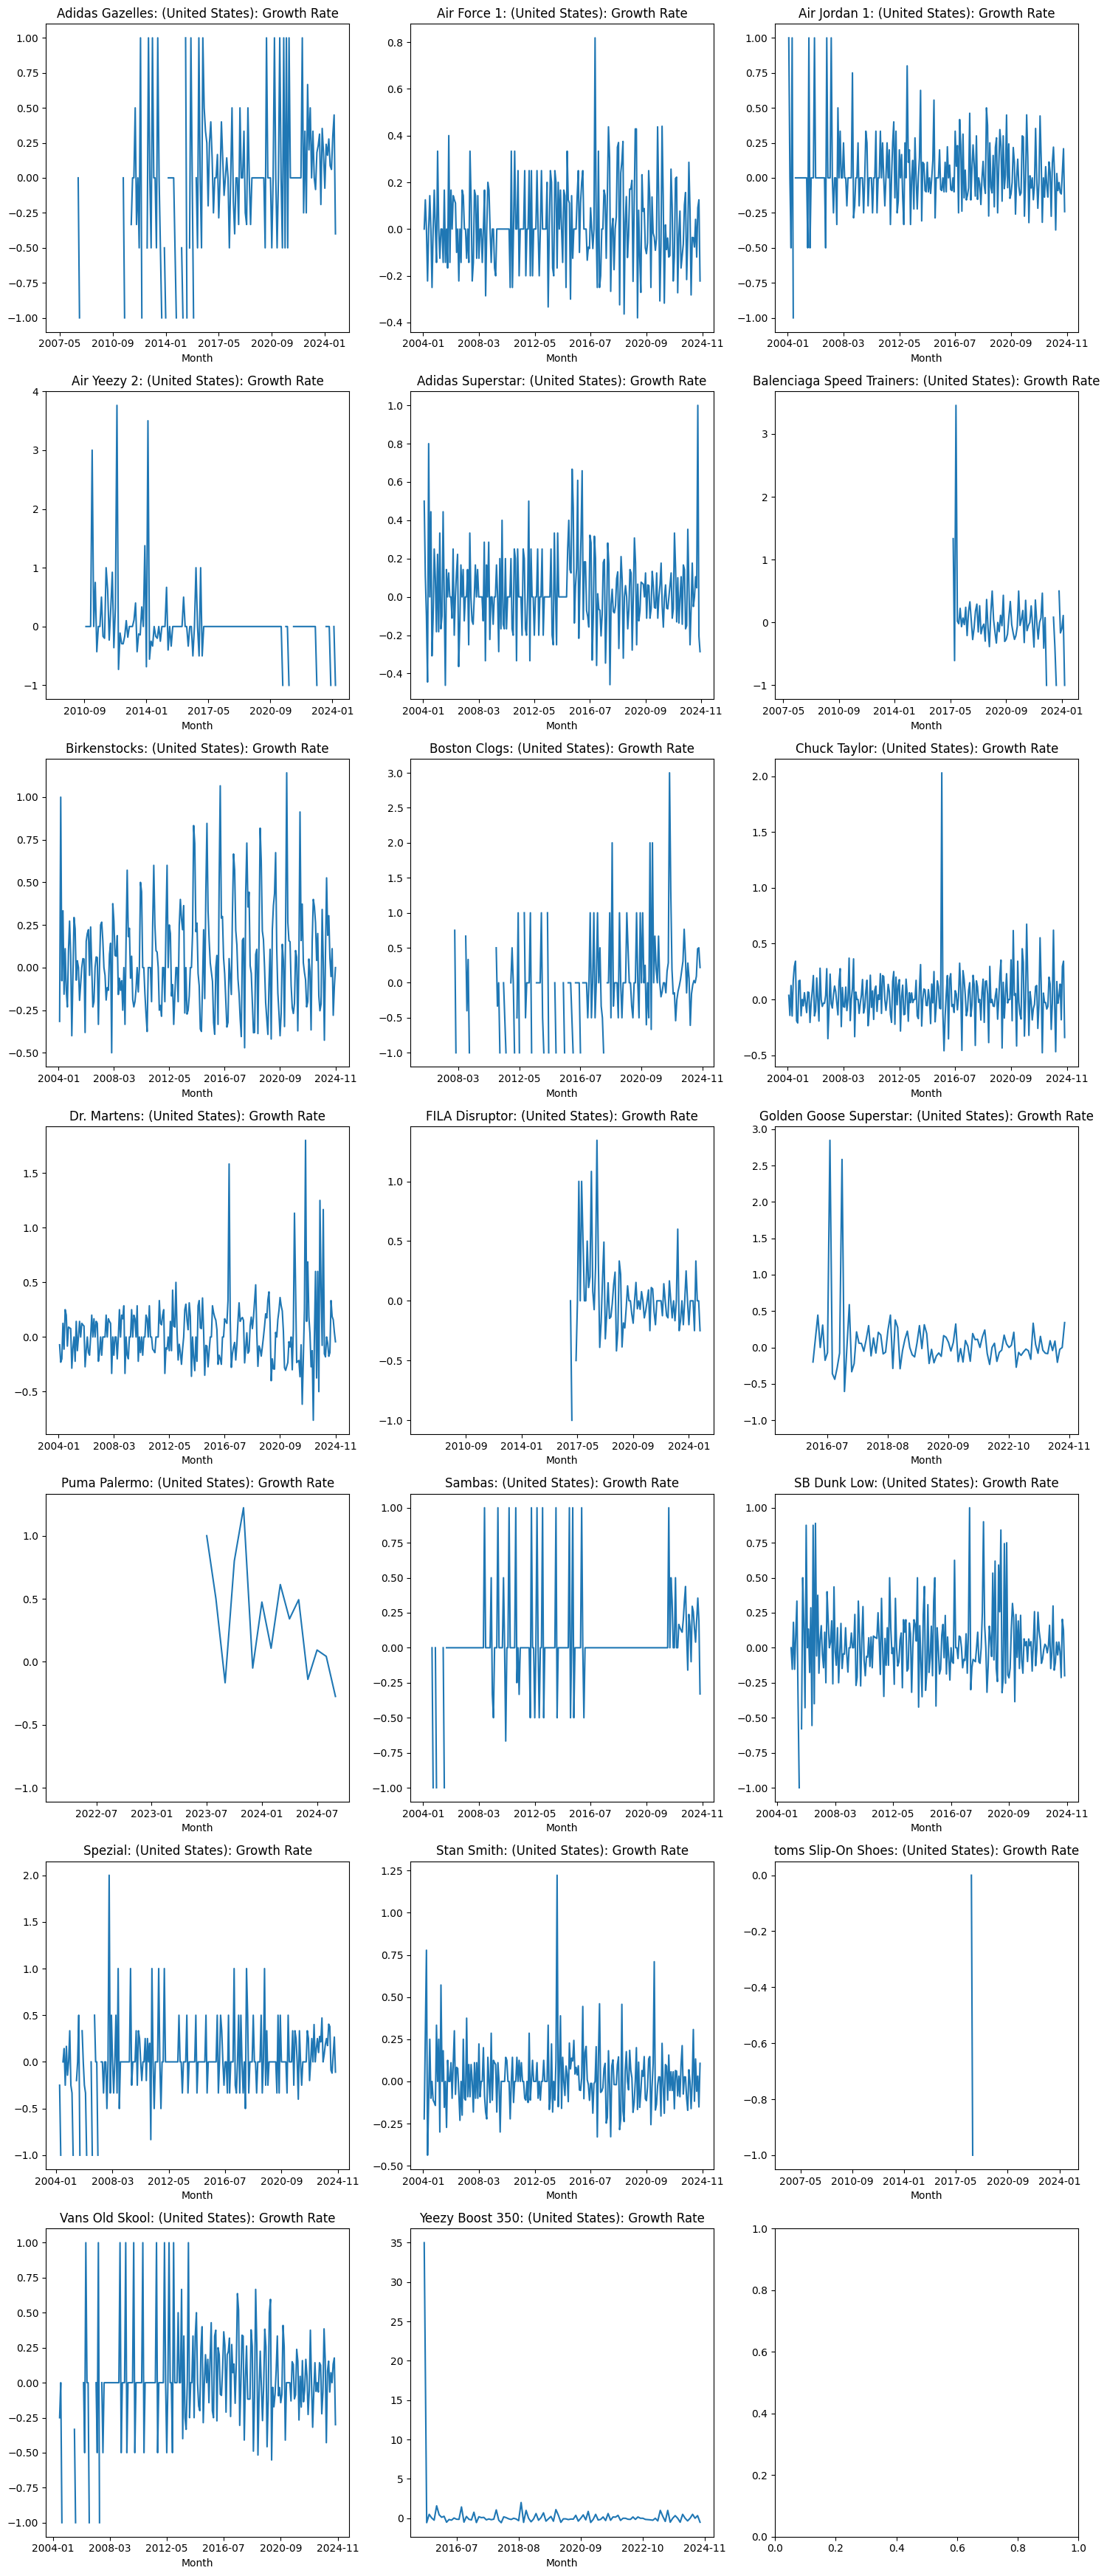

In [87]:
# plot the data
plot_graphs(growth_rate_df, "Growth Rate")

In [11]:
# find the peaks of shoes' popularities (when they are trending). 
# set threshold to be 70
threshold = 70
peaks_df = pd.DataFrame(index=df.index)

for shoe in df.columns:
    peaks, _ = find_peaks(df[shoe], threshold)
    peaks_df[shoe] = 0
    peaks_df.iloc[peaks, peaks_df.columns.get_loc(shoe)] = 1
peaks_df.head()

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Brooks Ghost: (United States),Chuck Taylor: (United States),...,Puma Palermo: (United States),Reebok Floatride Energy: (Worldwide),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),UGGs: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


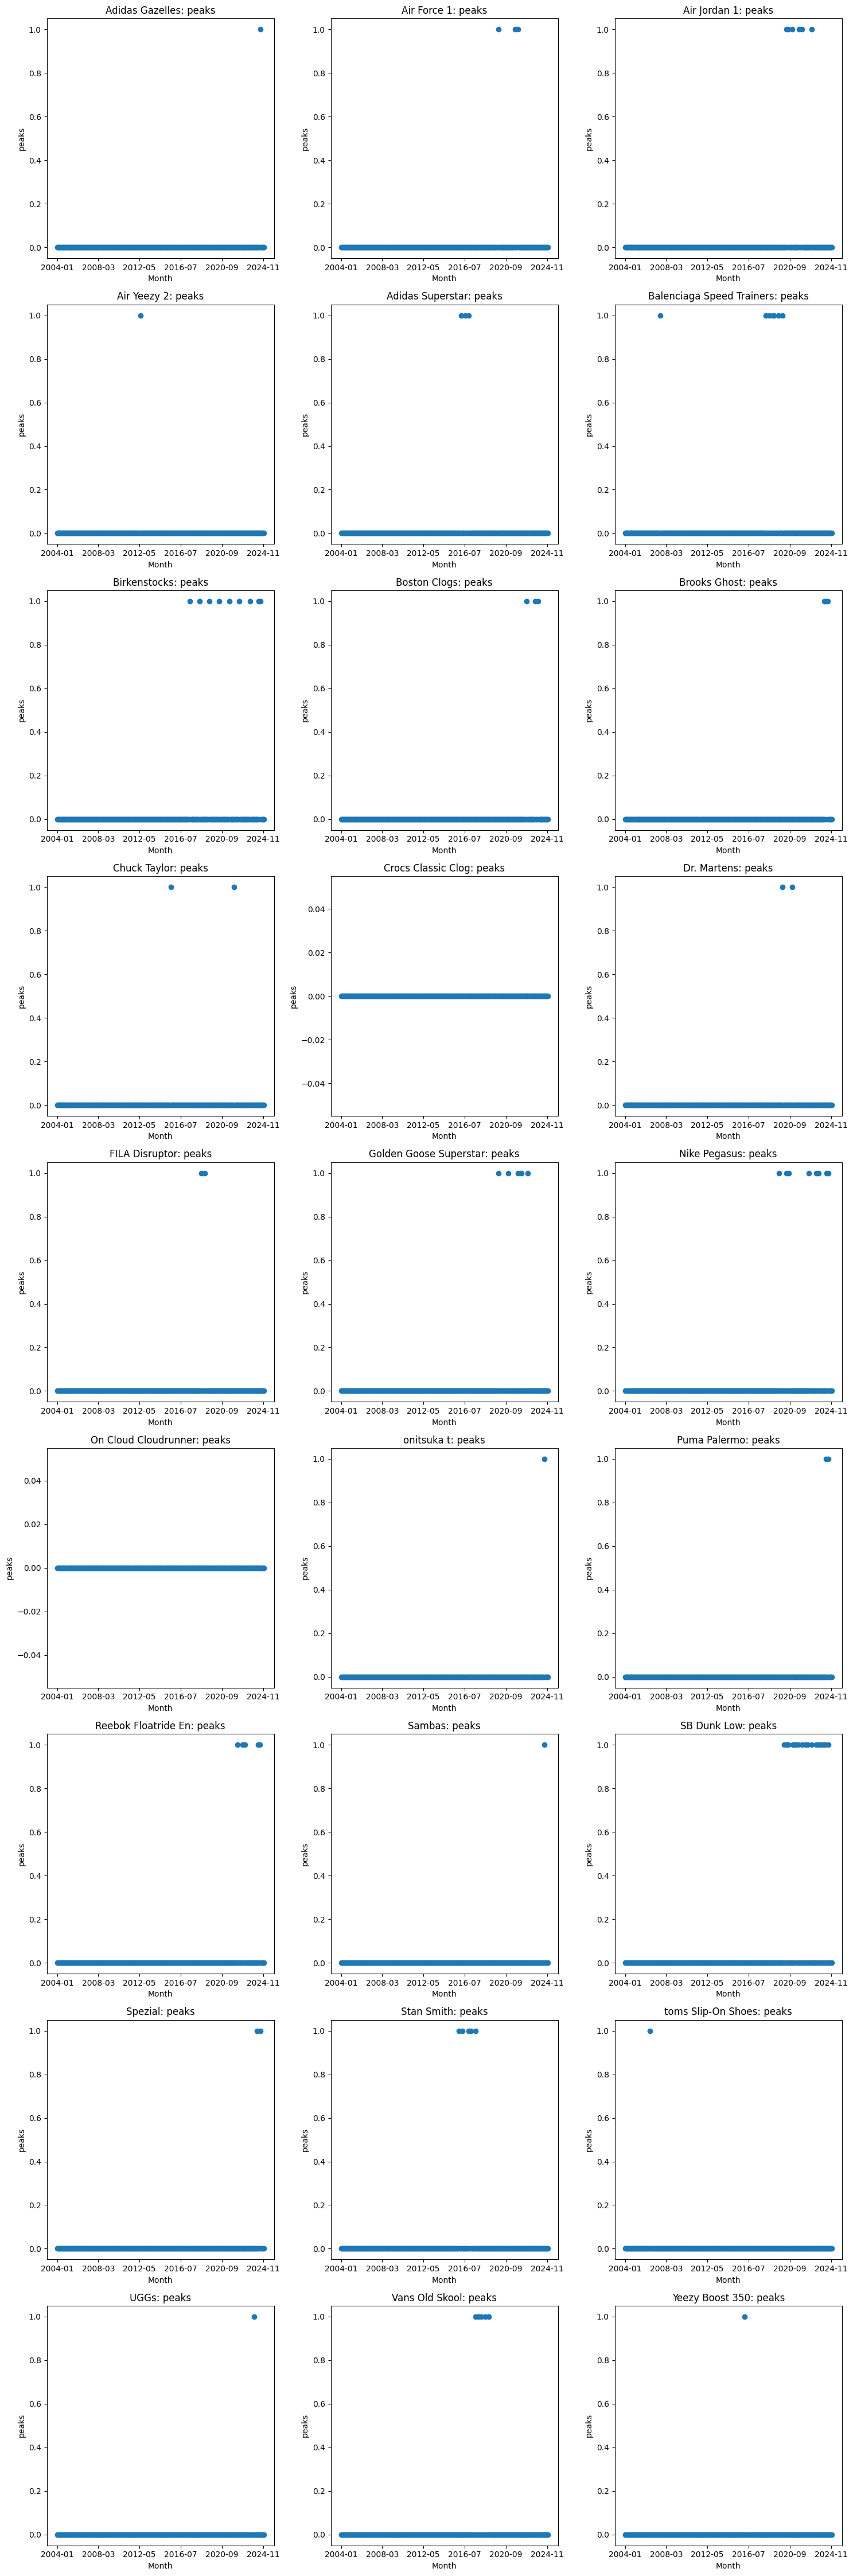

In [12]:
plot_graphs(peaks_df, "peaks", scatter=True)

In [90]:
# moving average
window_size = 3  # For a 3-month window (approximately a season)
moving_avg_df = df.rolling(window=window_size).mean()

moving_avg_df.head()

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Chuck Taylor: (United States),Dr. Martens: (United States),FILA Disruptor: (United States),Golden Goose Superstar: (United States),Puma Palermo: (United States),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,
2004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,0.0,8.333333,1.666667,0.0,8.333333,0.0,19.333333,0.0,26.333333,12.333333,0.0,0.0,0.0,0.333333,0.0,2.666667,8.333333,0.0,0.0,0.0
2004-04,0.0,8.666667,1.666667,0.0,9.333333,0.0,21.000000,0.0,26.333333,10.333333,0.0,0.0,0.0,0.000000,0.0,4.666667,10.666667,0.0,0.0,0.0
2004-05,0.0,8.333333,1.666667,0.0,8.000000,0.0,27.333333,0.0,24.666667,9.000000,0.0,0.0,0.0,0.333333,0.0,4.666667,11.333333,0.0,0.0,0.0


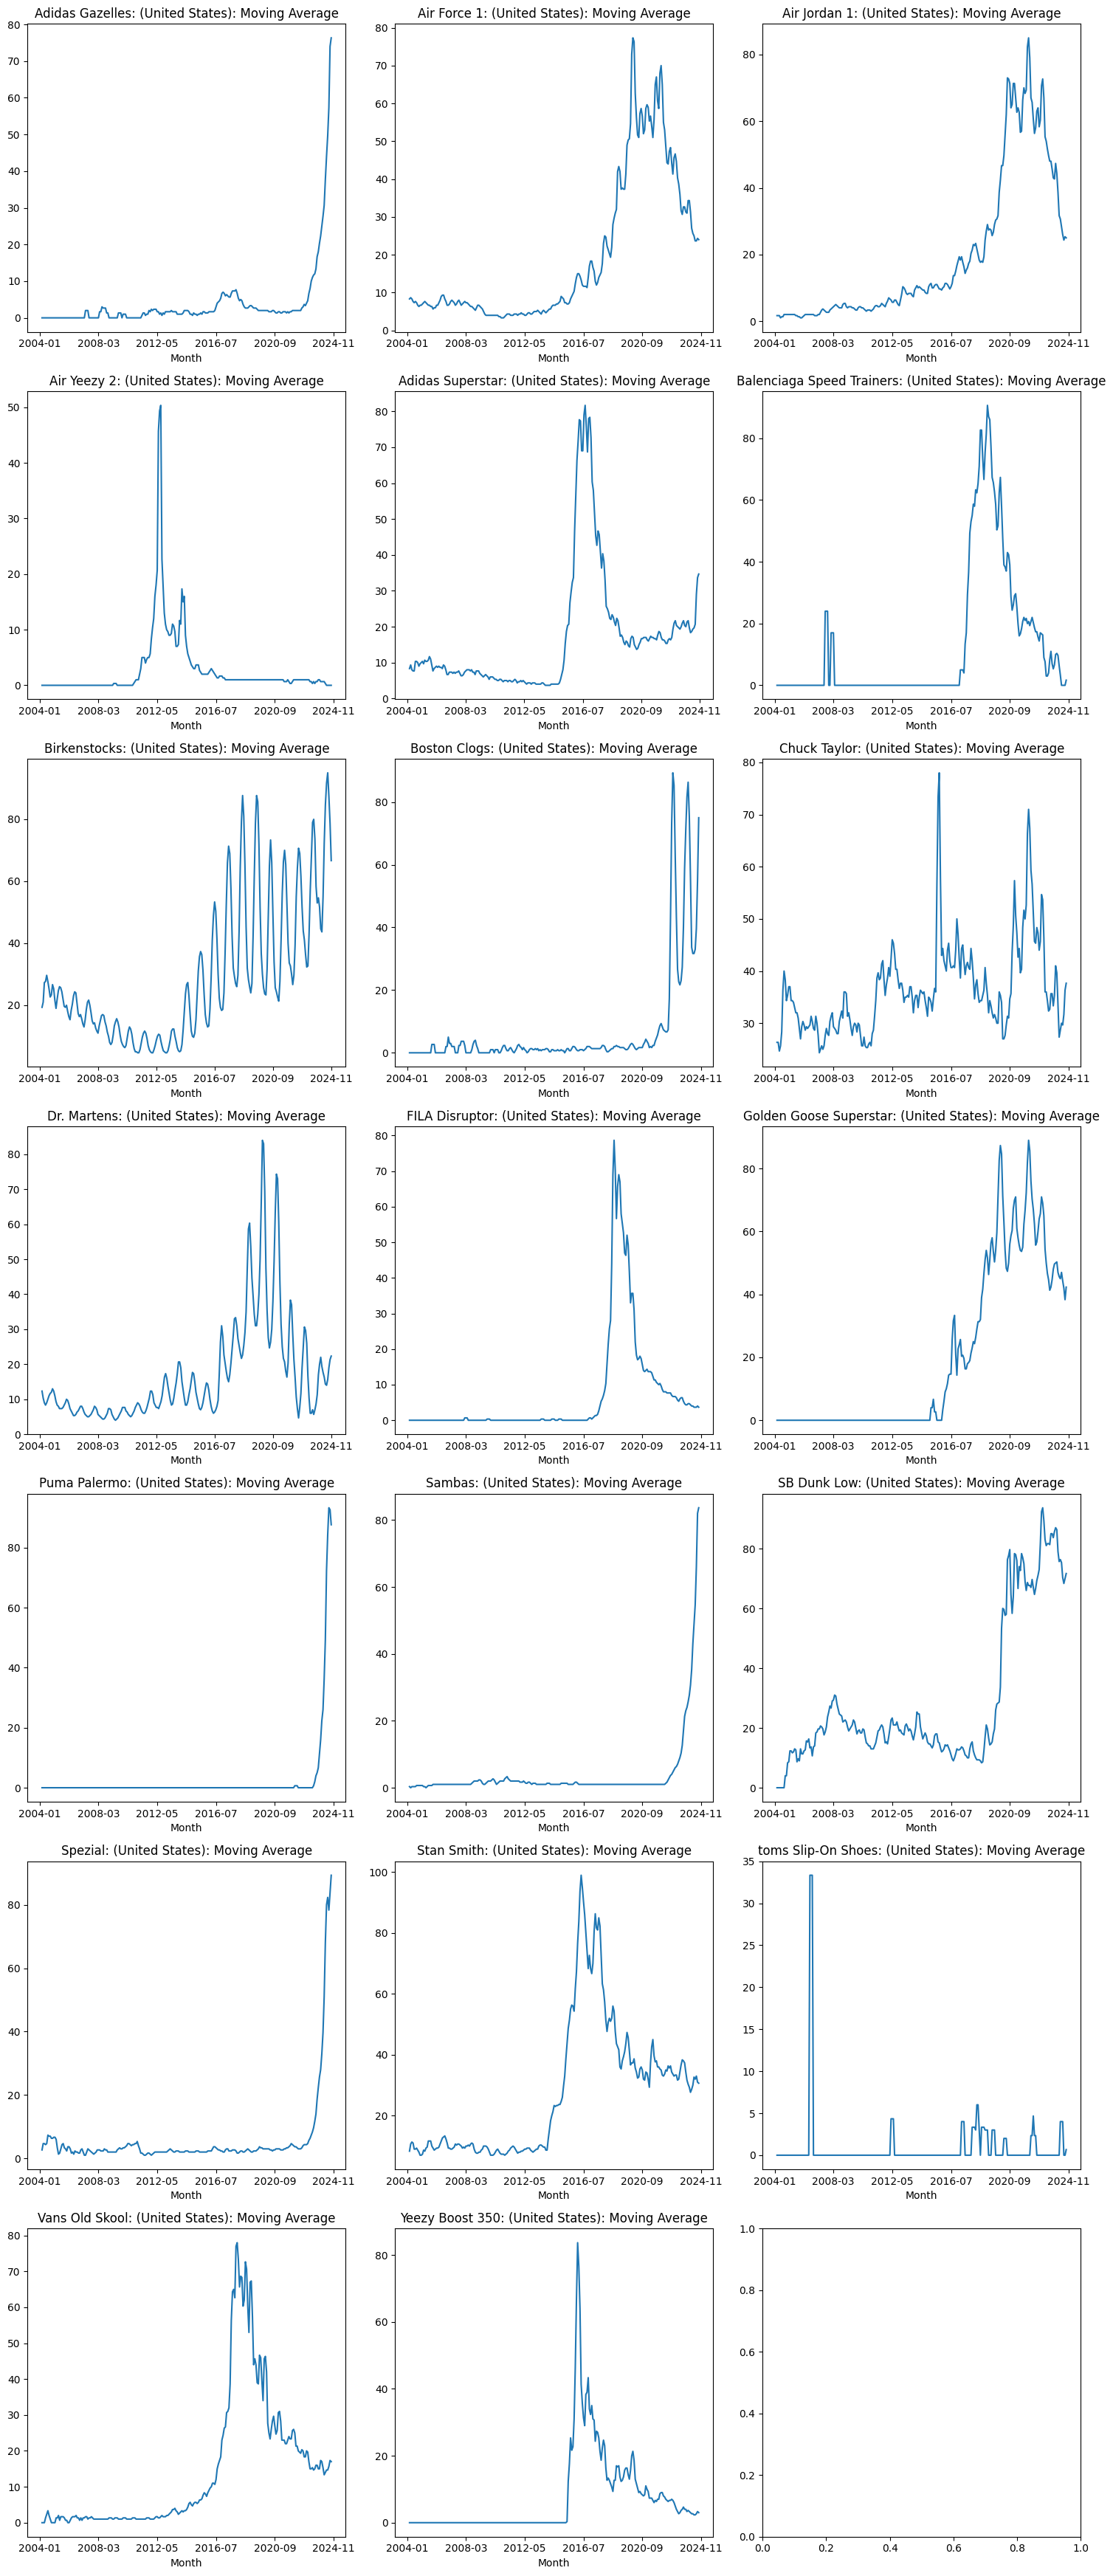

In [91]:
plot_graphs(moving_avg_df, "Moving Average")

In [92]:
# add lag features t-1, t-2, ... (start with just t-1 and t-2)
lag_1_df = df.shift(1)
lag_1_df

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Chuck Taylor: (United States),Dr. Martens: (United States),FILA Disruptor: (United States),Golden Goose Superstar: (United States),Puma Palermo: (United States),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,
2004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,0.0,8.0,1.0,0.0,6.0,0.0,19.0,0.0,27.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0
2004-03,0.0,8.0,2.0,0.0,9.0,0.0,13.0,0.0,28.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2004-04,0.0,9.0,2.0,0.0,10.0,0.0,26.0,0.0,24.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0
2004-05,0.0,9.0,1.0,0.0,9.0,0.0,24.0,0.0,27.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07,53.0,22.0,23.0,0.0,21.0,0.0,95.0,35.0,27.0,12.0,4.0,39.0,86.0,62.0,59.0,73.0,32.0,0.0,15.0,3.0
2024-08,69.0,24.0,24.0,0.0,22.0,0.0,90.0,52.0,35.0,16.0,4.0,38.0,94.0,84.0,71.0,79.0,33.0,0.0,17.0,3.0
2024-09,100.0,27.0,29.0,0.0,44.0,0.0,100.0,78.0,47.0,19.0,4.0,38.0,98.0,100.0,80.0,100.0,28.0,0.0,20.0,4.0


In [93]:
lag_2_df = df.shift(2)
lag_2_df

,Adidas Gazelles: (United States),Air Force 1: (United States),Air Jordan 1: (United States),Air Yeezy 2: (United States),Adidas Superstar: (United States),Balenciaga Speed Trainers: (United States),Birkenstocks: (United States),Boston Clogs: (United States),Chuck Taylor: (United States),Dr. Martens: (United States),FILA Disruptor: (United States),Golden Goose Superstar: (United States),Puma Palermo: (United States),Sambas: (United States),SB Dunk Low: (United States),Spezial: (United States),Stan Smith: (United States),toms Slip-On Shoes: (United States),Vans Old Skool: (United States),Yeezy Boost 350: (United States)
Month,,,,,,,,,,,,,,,,,,,,
2004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,0.0,8.0,1.0,0.0,6.0,0.0,19.0,0.0,27.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0
2004-04,0.0,8.0,2.0,0.0,9.0,0.0,13.0,0.0,28.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2004-05,0.0,9.0,2.0,0.0,10.0,0.0,26.0,0.0,24.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07,50.0,25.0,26.0,0.0,19.0,0.0,90.0,32.0,33.0,14.0,3.0,49.0,100.0,52.0,75.0,83.0,34.0,0.0,15.0,2.0
2024-08,53.0,22.0,23.0,0.0,21.0,0.0,95.0,35.0,27.0,12.0,4.0,39.0,86.0,62.0,59.0,73.0,32.0,0.0,15.0,3.0
2024-09,69.0,24.0,24.0,0.0,22.0,0.0,90.0,52.0,35.0,16.0,4.0,38.0,94.0,84.0,71.0,79.0,33.0,0.0,17.0,3.0


In [94]:
# combine all into features
# X = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df, growth_rate_df, left_index=True, right_index=True, suffixes=(' popularity', ' growth rate')), peaks_df, left_index=True, right_index=True, suffixes=('', ' peaks')), moving_avg_df, left_index=True, right_index=True, suffixes=('', ' moving average')), lag_1_df, left_index=True, right_index=True, suffixes=('', 'lag 1')), lag_2_df, left_index=True, right_index=True, suffixes=('', 'lag 2'))
X = pd.merge(pd.merge(pd.merge(df, growth_rate_df, left_index=True, right_index=True, suffixes=(' popularity', ' growth rate')), peaks_df, left_index=True, right_index=True, suffixes=('', ' peaks')), moving_avg_df, left_index=True, right_index=True, suffixes=('', ' moving average'))

X.head()

,Adidas Gazelles: (United States) popularity,Air Force 1: (United States) popularity,Air Jordan 1: (United States) popularity,Air Yeezy 2: (United States) popularity,Adidas Superstar: (United States) popularity,Balenciaga Speed Trainers: (United States) popularity,Birkenstocks: (United States) popularity,Boston Clogs: (United States) popularity,Chuck Taylor: (United States) popularity,Dr. Martens: (United States) popularity,...,FILA Disruptor: (United States) moving average,Golden Goose Superstar: (United States) moving average,Puma Palermo: (United States) moving average,Sambas: (United States) moving average,SB Dunk Low: (United States) moving average,Spezial: (United States) moving average,Stan Smith: (United States) moving average,toms Slip-On Shoes: (United States) moving average,Vans Old Skool: (United States) moving average,Yeezy Boost 350: (United States) moving average
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,0.0,8.0,1.0,0.0,6.0,0.0,19,0.0,27.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,0.0,8.0,2.0,0.0,9.0,0.0,13,0.0,28.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,0.0,9.0,2.0,0.0,10.0,0.0,26,0.0,24.0,10,...,0.0,0.0,0.0,0.333333,0.0,2.666667,8.333333,0.0,0.0,0.0
2004-04,0.0,9.0,1.0,0.0,9.0,0.0,24,0.0,27.0,8,...,0.0,0.0,0.0,0.000000,0.0,4.666667,10.666667,0.0,0.0,0.0
2004-05,0.0,7.0,2.0,0.0,5.0,0.0,32,0.0,23.0,9,...,0.0,0.0,0.0,0.333333,0.0,4.666667,11.333333,0.0,0.0,0.0
